<a href="https://colab.research.google.com/github/oracolo/myjupyno/blob/main/Julia_e_Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gli insiemi di Julia e Mandelbrot
## Numeri complessi
I numeri complessi non sono solo complessi, sono _strani_. Alcune operazioni che con i numeri reali sono banali, con i numeri complessi hanno tutto un altro sapore.

Un numero complesso $z$ è la somma di un numero reale $x$ e di un numero immaginario $y$:

$$z = x + iy$$

Sui numeri complessi "funzionano" tutte le operazioni che siamo soliti fare sui numeri reali, a patto di ricordare che $i^2 = -1$.
Questo giustifica pienamente, per $i$, il nome "unità immaginaria": difficile trovare numeri reali che elevati al quadrato siano negativi…

Ad esempio, il prodotto di $(2+3i)$ e $(-1+2i)$ si calcola così:

$$(2+3i) \cdot (-1+2i) = -2+4i-3i+6i^2 = -2+i-6=-8+i$$

Python ci viene in aiuto, se vogliamo fare questi calcoli:

In [ ]:
a = complex(2, 3)
b = complex(-1, 2)
print(a * b)

(-8+1j)


…con la doverosa premessa che in molti ambiti, tra cui quello ingegneristico, l'unità immaginaria $i$ viene chiamata $j$ per evitare ambiguità.

Ovviamente, elevare al quadrato un numero complesso significa moltiplicarlo per sé stesso con le regole appena viste.

Un altro modo per rappresentare un numero complesso è la cosiddetta _forma polare_: invece di esprimerlo tramite la parte reale e la parte immaginaria, si esprime tramite la distanza dall'origine nel piano di _Argand-Gauss_ (che poi è un piano cartesiano che fa il sostenuto solo perché in ordinata ci sono numeri complessi anziché $y$) e tramite l'angolo che la congiungente tra il numero e l'origine forma con il semiasse positivo dei numeri reali.

Ad esempio, il numero:

$$\sqrt{3} + 2i$$

può essere espresso come:

$$2 \cdot (\cos\frac{\pi}{6}+i \sin\frac{\pi}{6})$$

(non serve fidarsi, basta fare i calcoli) e in questo caso la distanza dall'origine ($2$) prende il nome di **modulo** del numero complesso, l'angolo rispetto al semiasse positivo dei numeri reali ($\frac{\pi}{6}$) prende il nome di **argomento**.

Grazie al signor Eulero e ad una formula che molti definiscono _la più bella della matematica_, cioè la seguente identità:

$$e^{i\pi}+1=0$$

_(la cui dimostrazione non è affatto banale)_, possiamo esprimere i numeri complessi anche in una forma detta **forma esponenziale**: si può dimostrare che

$$e^{i\theta} = cos(\theta)+i sin(\theta)$$

per cui un numero complesso di modulo $\rho$ e argomento $\theta$ può essere scritto come:

$$\rho \cdot e^{i\theta}$$

Il numero complesso sopra, $2(\cos\frac{\pi}{6}+i \sin\frac{\pi}{6})$, può quindi essere espresso anche come

$$2e^{\frac{\pi}{6}i}$$

## E anche oggi, funzioni ricorsive
Bene, ma perché stiamo parlando di numeri complessi?

Ricorderete che, nelle scorse lezioni, abbiamo parlato di funzioni che, ricalcolate molte volte di seguito, portavano a risultati bislacchi.

Ad esempio, nel caso dell'equazione logistica discreta, partivamo da un certo valore $x_0$ e calcolavamo ricorsivamente

$$x_{n+1}=rx_n\cdot(1-x_n)$$

…e abbiamo visto che, per certi valori di $r$, si arrivava a dei valori di $x_n$ che oscillavano in modo completamente caotico.

Mentre, nel caso dei sistemi di funzioni iterate, partivamo da una porzione qualunque del piano (i matematici l'avrebbero chiamata $\mathbb{R}^2$) e, applicando ricorsivamente un certo insieme di trasformazioni, facevamo "collassare" l'insieme di partenza verso un _attrattore_ che aveva una dimensione _frattale_ —spesso più di una dimensione e meno di due, o più di due ma meno di tre.

Anche questa volta vogliamo applicare ricorsivamente una funzione tutto sommato facile, ma da calcolare su numeri complessi:

$$z_{n+1} = z_n^2 + c$$

$z$ e $c$ non saranno numeri reali, ma complessi; il che significa che potremo rappresentare i valori $z_n$ che quest'equazione via via genererà in un grafico a due dimensioni.

## Elevare al quadrato un numero complesso
Nella funzione che abbiamo intenzione di esaminare c'è il quadrato di un numero complesso. Cerchiamo di capire cosa rappresenti geometricamente.

Partiamo dalla forma esponenziale.

Se

$$z = \rho \cdot e^{i\theta}$$

appare chiaro che

$$z^2 = \rho^2 \cdot (e^{i\theta})^2 = \rho^2 \cdot e^{i2\theta}$$

Non è così difficile, quindi: elevare al quadrato un numero complesso **eleva al quadrato** la sua distanza dall'origine e **raddoppia** l'angolo che forma con l'asse dei numeri reali.

Tracciamo qualche grafico. Iniziamo importando tutte le librerie che ci serviranno.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

E definiamo un innocuo numero complesso.

In [ ]:
innocuo = complex(0.9, 0.1)

Il modulo è 

In [ ]:
print(abs(innocuo))

0.9055385138137417


Meno di uno. Guardiamo dov'è sul piano complesso:

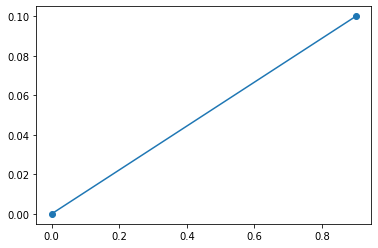

In [ ]:
origine = (0, 0)
# dobbiamo ottenere la parte reale e la parte immaginaria
# del nostro numero innocuo per disegnarlo
innocuoXY = innocuo.real, innocuo.imag

# definiamo una linea tra l'origine e il numero innocuo
linea = [origine, innocuoXY]

# e disegniamola
x, y = zip(*linea)
plt.plot(x, y, marker="o")
plt.show()

Il nostro numero immaginario è lassù, in alto a destra.
Ora proviamo a elevarlo al quadrato e guardiamo dove va a finire…

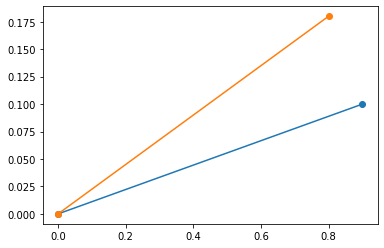

In [ ]:
innocuo2 = innocuo**2
innocuoXY2 = innocuo2.real, innocuo2.imag

linea2 = [origine, innocuoXY2]

x2, y2 = zip(*linea2)
plt.plot(x, y, x2, y2, marker="o")
plt.show()

Quello che ci aspettavamo; modulo elevato al quadrato (era meno di 1, quindi è diminuito), angolo raddoppiato. Ripetiamo qualche volta il calcolo, per farci un'idea.

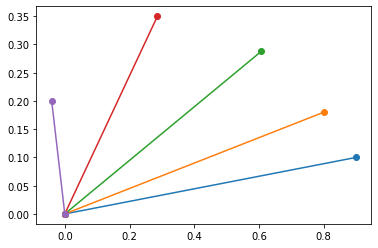

In [ ]:
for _ in range(5):
    linea = [origine, (innocuo.real, innocuo.imag)]
    x, y = zip(*linea)
    plt.plot(x, y, marker="o")
    
    innocuo = innocuo ** 2
plt.show()

Se questo numero innocuo avesse, invece, un modulo maggiore di 1…

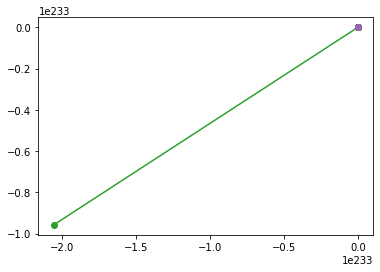

In [ ]:
innocuo = complex(1.1, 0.3)
for _ in range(15):
    linea = [origine, (innocuo.real, innocuo.imag)]
    x, y = zip(*linea)
    plt.plot(x, y, marker="o")
    
    innocuo = innocuo ** 2
plt.show()

… il valore del modulo crescerebbe fino all'infinito, mentre l'angolo (come nel caso precedente) continuerebbe a raddoppiare.

E aggiungere una costante? Nella nostra funzione c'è un $+c$, dopotutto.

Aggiungere una costante è più o meno come nei numeri reali: si **trasla** il numero complesso. Aggiungere $3$ al numero reale $5$ lo sposta di 3 unità verso destra; aggiungere $1+2i$ al numero complesso $5$ lo sposta di una unità verso destra (asse reale) e due verso l'alto (asse immaginario).

L'effetto di aggiungere una costante ad ogni iterazione, dopo aver elevato al quadrato $z$, aggiunge al tutto una certa imprevedibilità.

## Orbite
Definiamo una funzione che parta da un certo valore di $z$ e calcoli _l'orbita_ dei valori successivi, ossia la sequenza di tutti i valori assunti da $z$; ci interessa sapere, come nel caso dell'equazione logistica, se i valori si avvicinino a un attrattore oppure se divergano all'infinito.

La nostra funzione calcola valori successivi di $z$ e si ferma dopo un certo numero di iterazioni, oppure quando il valore del modulo diventa maggiore di 2—si può dimostrare che, superata questa soglia, i valori divergono sicuramente.

In [ ]:
def juliaOrbits(z, c, maxIter):
    iterations = 0
    orbitX, orbitY = [z.real], [z.imag]
    # Finché i valori di z non escono dalla circonferenza
    # di raggio 2 (perché, se lo fanno, non tornano più indietro...)
    while abs(z) < 2:
        # eleviamo z al quadrato e aggiungiamo c
        z = z ** 2 + c
        iterations += 1
        
        # salviamo i valori di parte reale e immaginaria
        # in due vettori, uno per la x e uno per la y
        orbitX.append(z.real)
        orbitY.append(z.imag)
        
        # se, dopo maxIter iterazioni, i valori non divergono...
        # assumiamo che non lo faranno mai
        # (questa è un'approssimazione: più iterazioni calcoliamo,
        # più sarà preciso il grafico)
        if iterations >= maxIter:
            return orbitX, orbitY, 0
        
    # se siamo arrivati qui, i valori di z divergono: restituiamo
    # al programma dopo quante iterazioni siamo "usciti"
    return orbitX, orbitY, iterations

Impostiamo ora un valore di c e tracciamo il grafico di alcune orbite, a partire da diversi valori di z: la parte immaginaria $0,2i$ e alcuni valori della parte reale, tra $-1,5$ e $3$.

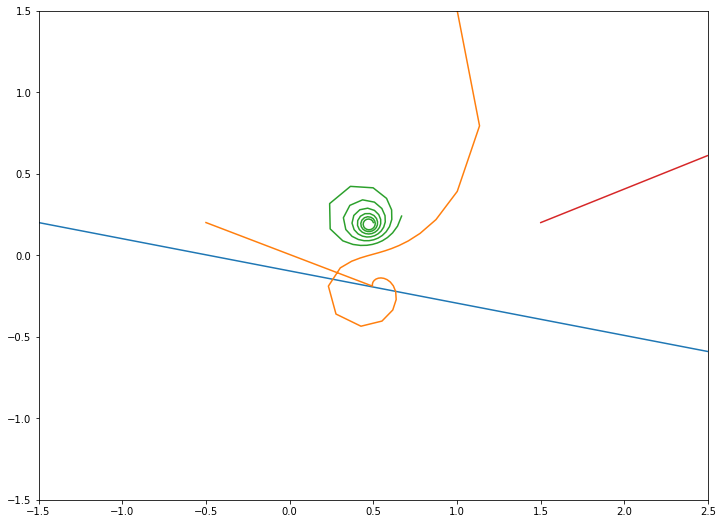

In [ ]:
c = complex(0.285, 0.01)
plt.figure(figsize = (12, 9))
plt.gca(xlim = (-1.5, 2.5), ylim = (-1.5, 1.5), aspect = "auto")

testY = 0.2
for testX in np.arange(-1.5, 3, 1):
    x, y, color = juliaOrbits(complex(testX, testY), c, 100)
    plt.plot(x, y)
plt.show()

Le traiettorie sono piuttosto strane; per alcuni valori iniziali di z, l'orbita diverge subito. In altri casi continua a ruotare intorno a un certo valore, "precipitando", per altri ancora ruota in modo apparentemente stabile, per poi sfuggire verso l'infinito.

## L'insieme di Julia
E se provassimo a tracciare una mappa? Per ogni punto del piano complesso, fissato un valore di $c$, applichiamo ripetutamente l'equazione che eleva al quadrato e trasla e controlliamo se l'orbita diverge all'infinito oppure no. Nel caso diverga, coloreremo quel punto di bianco; altrimenti, di nero.

L'idea risale al matematico francese Gaston Julia, che investigò la dinamica di funzioni polinomiali di questo tipo tra il 1915 e il 1918. I punti del piano colorati in nero, ossia quelli che non divergono nonostante l'iterazione della funzione $z_{n+1} = z_n^2 + c$, appartengono all'insieme di Julia per un certo valore del parametro $c$.

Iniziamo con il definire una funzione semplificata, che non tenga traccia dell'intera orbita ma si limiti a restituire zero se dopo un certo numero di iterazioni l'orbita non diverge verso l'infinito—e, nel caso diverga, dopo quante iterazioni sia successo.

In [ ]:
def julia(z, c, maxIter):
    iterations = 0
    while abs(z) < 2:
        z = z ** 2 + c
        iterations += 1
        if iterations >= maxIter:
            return 0
    return iterations

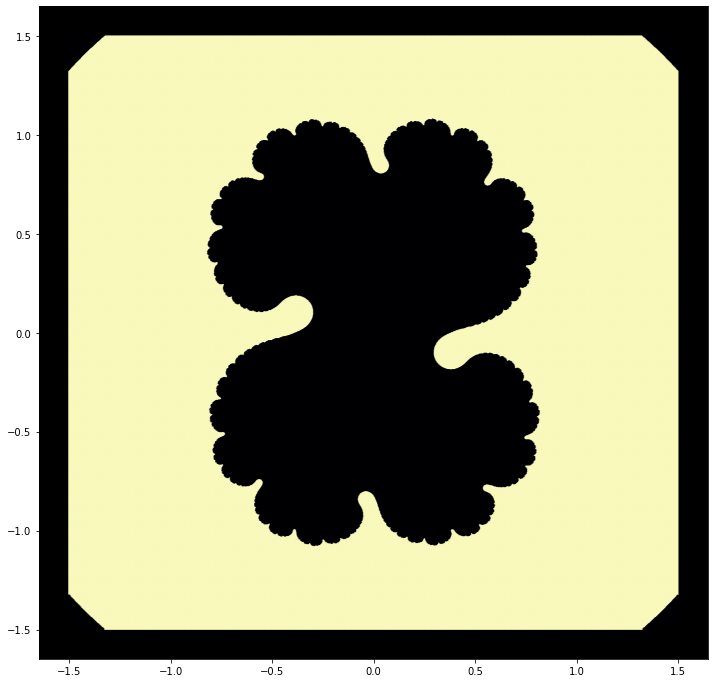

In [ ]:
x, y, color = [], [], []

# Calcoliamo la "divergenza" per parecchi valori:
# da -1.5 a 1.5 e da -1.5i a 1.5i, a intervalli di 2 millesimi
for testY in np.arange(1.5, -1.5, -0.002):
    for testX in np.arange(-1.5, 1.5, 0.002):
        x.append(testX)
        y.append(testY)
        # calcoliamo la stabilità
        stable = julia(complex(testX, testY), complex(0.285, 0.01), 15)
        if stable == 0:
            color.append(0)
        else:
            color.append(1)

plt.figure(figsize=(12,12))
plt.gca().set_facecolor("black")
plt.scatter(x, y, c = color, s = .05, marker='o', cmap = "magma")
plt.show()

Alquanto singolare, no? Vediamo che genere di grafico otteniamo se, invece di limitarci al bianco e nero, proviamo a colorare ciascun punto del piano complesso con il numero di iterazioni necessarie a quel punto per sfuggire verso l'infinito.

Definiamo una funzione che tracci il grafico, in modo da poter sperimentare con diversi parametri.

In [ ]:
def juliaFractal(c, maxIter = 150, resolution = 500, topLeft = (-1.5, 1.5), bottomRight = (1.5, -1.5)):
    x, y, color = [], [], []

    for testY in np.arange(topLeft[1], bottomRight[1], -1/resolution):
        for testX in np.arange(topLeft[0], bottomRight[0], 1/resolution):
            x.append(testX)
            y.append(testY)
            color.append(julia(complex(testX, testY), c, maxIter))

    plt.figure(figsize=(12,12))
    plt.gca().set_facecolor("black")
    plt.scatter(x, y, c = color, s = (250/resolution)**2, marker='.', cmap = "magma")
    plt.show()

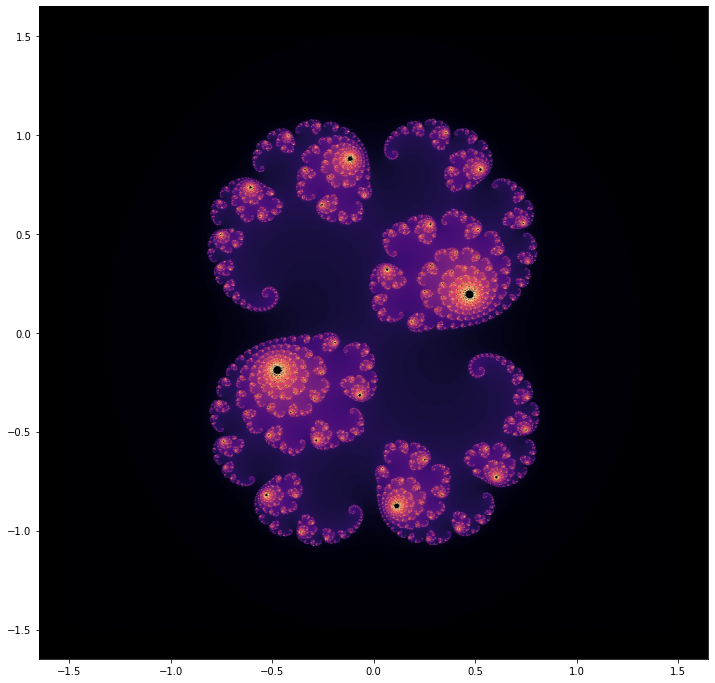

In [ ]:
juliaFractal(complex(0.285, 0.01), 150)

Ed ecco i curiosi insiemi che si ottengono per altri valori di $c$:

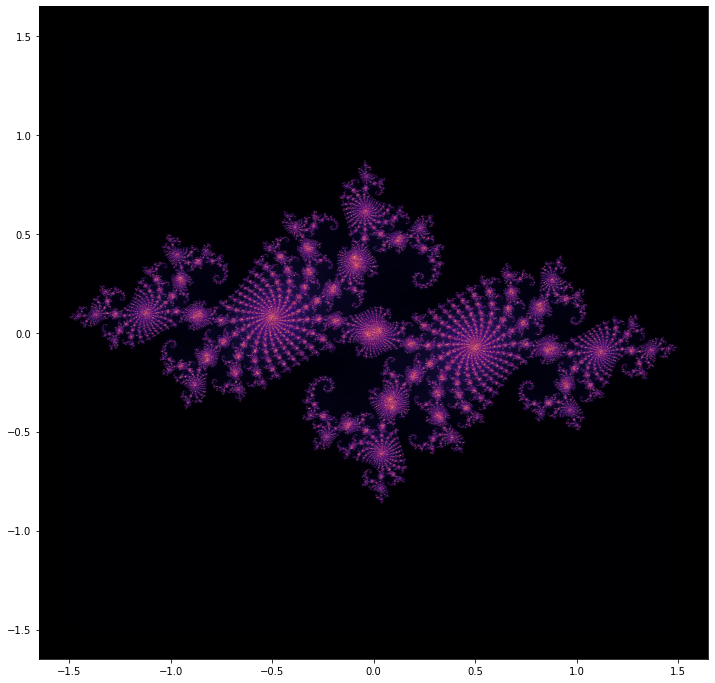

In [ ]:
juliaFractal(complex(-0.744, 0.148), 750)

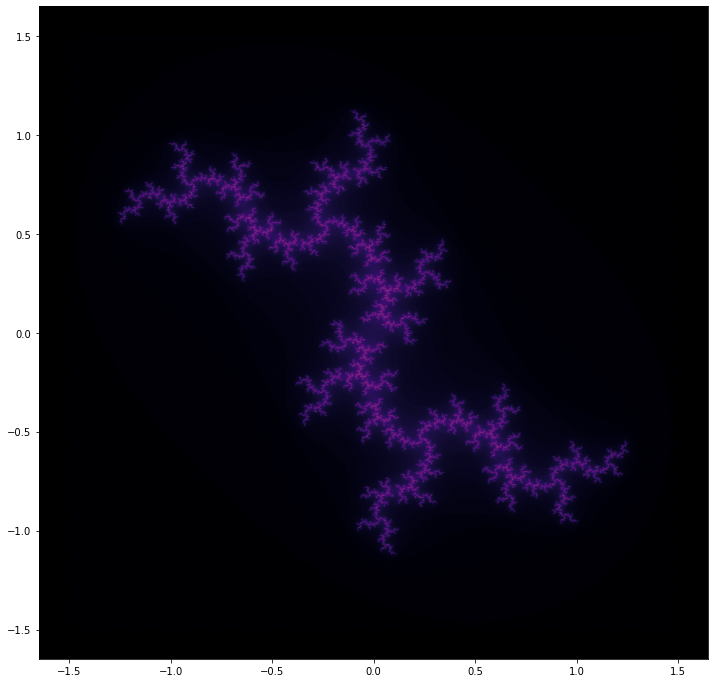

In [ ]:
juliaFractal(complex(0, 0.8), 250)

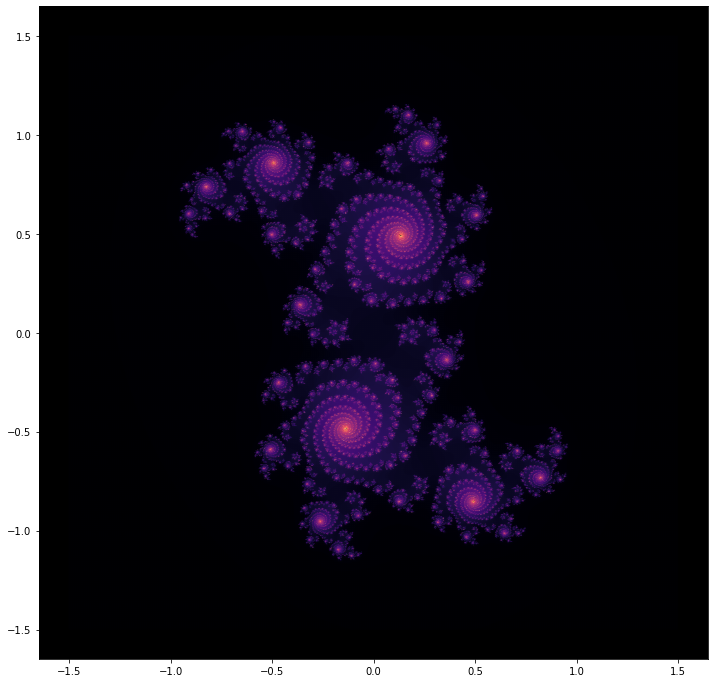

In [ ]:
juliaFractal(complex(0.355, 0.355), 500)

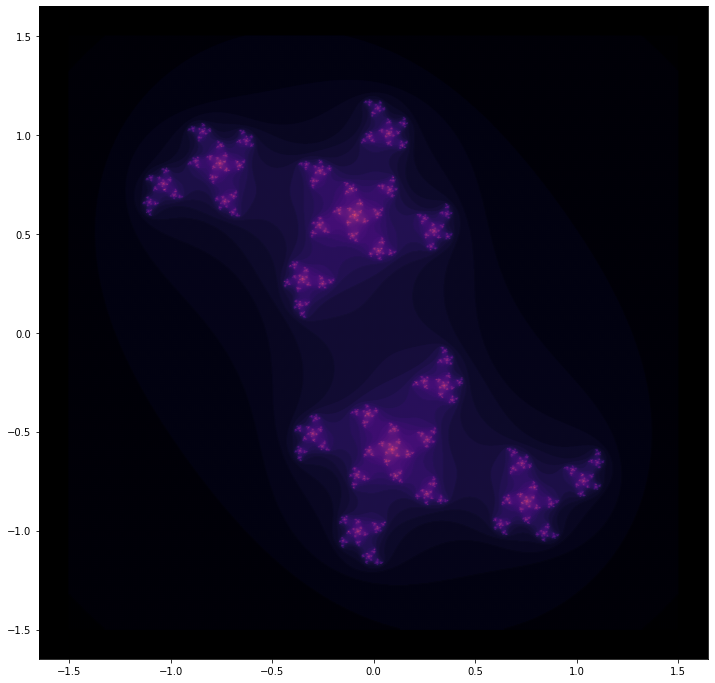

In [ ]:
juliaFractal(complex(0.25, 0.7), 500)

Possiamo anche sperimentare con valori diversi del parametro $c$ calcolando la divergenza per meno punti del piano (abbassando, cioè, il valore del parametro _resolution_):

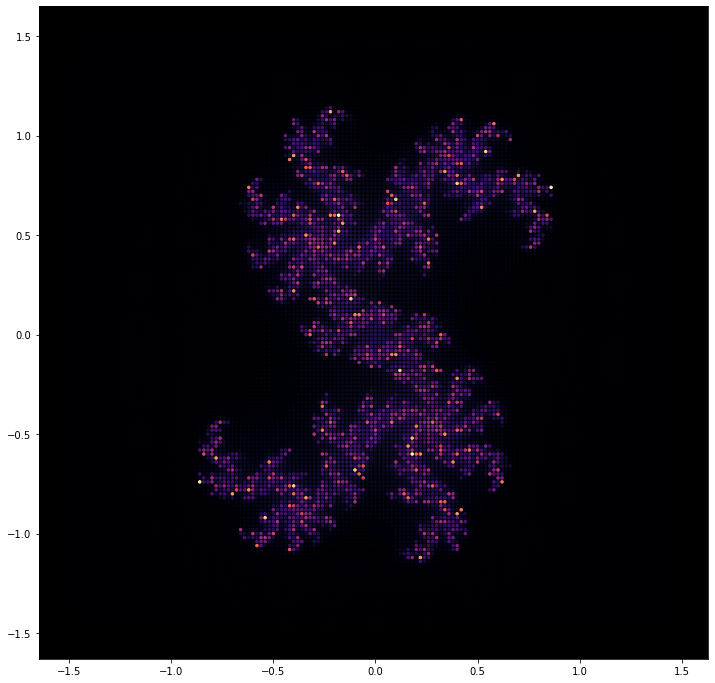

In [ ]:
juliaFractal(complex(0.4, -0.2), 500, 50)

## L'insieme di Mandelbrot
Per ogni valore del parametro $c$, otteniamo un diverso insieme di Julia; l'idea del matematico francese Benoit Mandelbrot, negli anni '80, fu quella di tracciare _una mappa_ di tutti i possibili insiemi di Julia. Invece di mantenere fisso il parametro $c$ in tutto il grafico, si fa variare e si fa corrispondere a ciascun punto di cui si vuole calcolare la divergenza o meno.

In pratica, l'equazione che calcoliamo ricorsivamente diventa

$$z_{n+1} = z_n^2 + z_0$$

A ciascun punto dell'insieme di Mandelbrot, quindi, corrisponde un diverso insieme di Julia. È interessante notare che la forma locale dell'insieme di Mandelbrot è molto simile alla forma dell'insieme di Julia corrispondente.

Possiamo definire facilmente una funzione che tracci l'insieme di Mandelbrot basandoci sulla funzione che calcola gli insiemi di Julia:

In [ ]:
def mandelbrotFractal(maxIter = 150, resolution = 500, topLeft = (-2.25, 1.5), bottomRight = (0.5, -1.5)):
    x, y, color = [], [], []

    for testY in np.arange(topLeft[1], bottomRight[1], -1/resolution):
        for testX in np.arange(topLeft[0], bottomRight[0], 1/resolution):
            x.append(testX)
            y.append(testY)
            # la differenza rispetto al frattale di Julia è che qui non usiamo
            # il parametro c, ma usiamo direttamente il valore del punto di partenza
            color.append(julia(complex(testX, testY), complex(testX, testY), maxIter))

    plt.figure(figsize=(12,12))
    plt.gca().set_facecolor("black")
    plt.scatter(x, y, c = color, s = (250/resolution)**2, marker='o', cmap = "magma")
    plt.show()

Proviamo a dare un'occhiata...

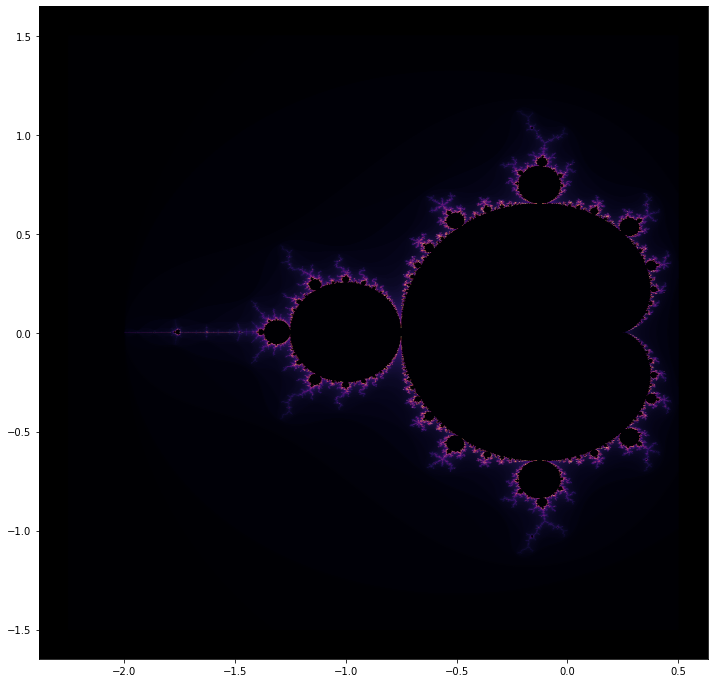

In [ ]:
mandelbrotFractal()